In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step


In [ ]:
# Preprocess CIFAR-10 data
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [ ]:
# Define a function to create CNN models
def create_cnn(input_shape):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

In [ ]:
# Task 1: Tuning learning rate and momentum for SGD optimizer
learning_rates = [0.01, 0.05, 0.1]
momentum_values = [0.0, 0.5, 0.9]
batch_size = 64
epochs = 10
results_sgd = {}


Training with SGD - Learning Rate: 0.01, Momentum: 0.0

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.1581 - loss: 2.2642 - val_accuracy: 0.2491 - val_loss: 2.0418
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2826 - loss: 1.9647 - val_accuracy: 0.3276 - val_loss: 1.8584
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3693 - loss: 1.7568 - val_accuracy: 0.3648 - val_loss: 1.8378
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4240 - loss: 1.5929 - val_accuracy: 0.4358 - val_loss: 1.5816
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4646 - loss: 1.4812 - val_accuracy: 0.4467 - val_loss: 1.5413
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5015 - loss: 1.3967 - val_accuracy: 0.5128 - val_loss: 1.3578
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5249 - loss: 1.3369 - val_accuracy: 0.4158 - val_loss: 1.6357
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/

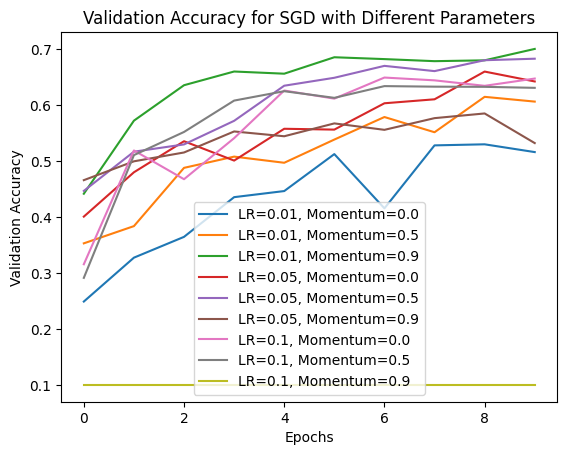

In [ ]:
for lr in learning_rates:
    for momentum in momentum_values:
        print(f"\nTraining with SGD - Learning Rate: {lr}, Momentum: {momentum}\n")

        # Create and compile model
        model = create_cnn(x_train.shape[1:])
        optimizer = optimizers.SGD(learning_rate=lr, momentum=momentum)
        model.compile(optimizer=optimizer,
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

        # Train model
        history = model.fit(
            x_train, y_train,
            epochs=epochs,
            batch_size=batch_size,
            validation_data=(x_test, y_test),
            verbose=1
        )

        # Store results
        results_sgd[(lr, momentum)] = history.history

        # Plot training and validation accuracy
        plt.plot(history.history['val_accuracy'], label=f"LR={lr}, Momentum={momentum}")

plt.title("Validation Accuracy for SGD with Different Parameters")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

In [ ]:
# Analyze best SGD parameters
best_sgd_params = max(results_sgd.keys(), key=lambda k: max(results_sgd[k]['val_accuracy']))
best_sgd_accuracy = max(results_sgd[best_sgd_params]['val_accuracy'])
print(f"\nBest SGD Parameters: Learning Rate={best_sgd_params[0]}, Momentum={best_sgd_params[1]}, Validation Accuracy={best_sgd_accuracy:.4f}\n")



Best SGD Parameters: Learning Rate=0.01, Momentum=0.9, Validation Accuracy=0.7009



In [ ]:
# Task 2: Compare Optimizers (RMSProp, AdaGrad, Adam)
optimizers_to_compare = {
    'SGD': optimizers.SGD(learning_rate=best_sgd_params[0], momentum=best_sgd_params[1]),
    'RMSProp': optimizers.RMSprop(learning_rate=best_sgd_params[0]),
    'AdaGrad': optimizers.Adagrad(learning_rate=best_sgd_params[0]),
    'Adam': optimizers.Adam(learning_rate=best_sgd_params[0])
}


Training with SGD optimizer

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.2470 - loss: 2.0189 - val_accuracy: 0.4487 - val_loss: 1.5043
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.4980 - loss: 1.3973 - val_accuracy: 0.5586 - val_loss: 1.2391
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5827 - loss: 1.1765 - val_accuracy: 0.6017 - val_loss: 1.1401
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6391 - loss: 1.0205 - val_accuracy: 0.6426 - val_loss: 1.0233
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6763 - loss: 0.9230 - val_accuracy: 0.6694 - val_loss: 0.9551
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7059 - loss: 0.8392 - val_accuracy: 0.6655 - val_loss: 0.9704
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7233 - loss: 0.7789 - val_accuracy: 0.6940 - val_loss: 0.8974
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7516 - l

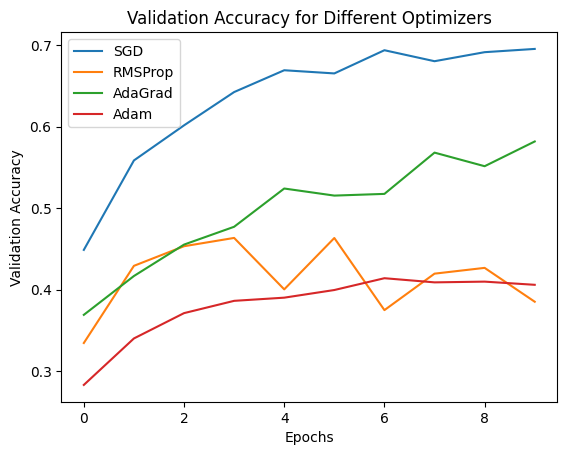

In [ ]:
results_optimizers = {}

for opt_name, opt in optimizers_to_compare.items():
    print(f"\nTraining with {opt_name} optimizer\n")

    # Create and compile model
    model = create_cnn(x_train.shape[1:])
    model.compile(optimizer=opt,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Train model
    history = model.fit(
        x_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(x_test, y_test),
        verbose=1
    )

    # Store results
    results_optimizers[opt_name] = history.history

    # Plot validation accuracy
    plt.plot(history.history['val_accuracy'], label=opt_name)

plt.title("Validation Accuracy for Different Optimizers")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

In [ ]:
# Analyze and Compare Optimizers
best_optimizer = max(results_optimizers.keys(), key=lambda k: max(results_optimizers[k]['val_accuracy']))
best_optimizer_accuracy = max(results_optimizers[best_optimizer]['val_accuracy'])
print(f"\nBest Optimizer: {best_optimizer}, Validation Accuracy: {best_optimizer_accuracy:.4f}\n")



Best Optimizer: SGD, Validation Accuracy: 0.6956

